# Linear Regression with TensorFlow
What can I expect my blood pressure to be when I am 31?

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib

import time
import datetime as dt

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

## Blood pressure (systolic values) for given ages

In [2]:
# Data from https://people.sc.fsu.edu/~jburkardt/datasets/regression/x03.txt
# Thanks to Helmut Spaeth
blood_pressure = np.array([[ 39,  47,  45,  47,  65,  46,  67,  42,  67,  56,  64,  56,  59,  34,  42,
                             48,  45,  17,  20,  19,  36,  50,  39,  21,  44,  53,  63,  29,  25,  69],
                           [144, 220, 138, 145, 162, 142, 170, 124, 158, 154, 162, 150, 140, 110, 128,
                            130, 135, 114, 116, 124, 136, 142, 120, 120, 160, 158, 144, 130, 125, 175]])

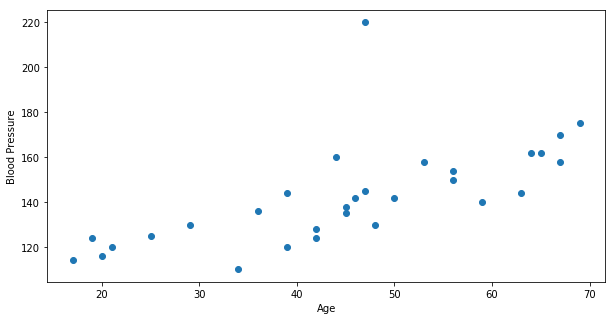

In [3]:
plt.plot(blood_pressure[0], blood_pressure[1], ".", markersize=12)
plt.ylabel("Blood Pressure")
plt.xlabel("Age")
#plt.savefig("blood_pressure.png", dpi=600, bbox_inches='tight', transparent=True)
plt.show()

## Create TensorFlow graph for linear regression

In [4]:
# Placeholders for graph input
# None means we are agnostic to batch size in placeholder variables
x = tf.placeholder(tf.float32, [None, 1], name='x')        # placeholder for input data
y = tf.placeholder(tf.float32, [None, 1], name='y')       # placeholder for labels

In [5]:
# Set up variables required for linear regression
W = tf.get_variable("W", [1,1], initializer=tf.truncated_normal_initializer) # weight matrix W
b = tf.get_variable("b", [1], initializer=tf.truncated_normal_initializer)   # intersect b

In [6]:
# Linear regression (defined as matrix multiplication)
y_pred = tf.matmul(x, W) + b

In [7]:
# Cost function defined as mean squared error: mean((y_ - y)^2)
mse = tf.reduce_mean(tf.square(y - y_pred))

In [8]:
# Define summaries to be shown in TensorBoard
tf.summary.scalar("Weight", W[0][0])
tf.summary.scalar("Bias", b[0])
tf.summary.scalar("0_Loss", mse)

<tf.Tensor '0_Loss:0' shape=() dtype=string>

In [9]:
steps = 40000
learning_rate = 0.0004

# Define a training step using Gradient Decent to minimize the mean squared error
optimization = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(mse)

In [10]:
# ------------------------------
# Activate logging for TensorBoard
# all logging data is written to a directory named "log" in the directory jupyter was started from
merged = tf.summary.merge_all()
st = dt.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%d_%H-%M-%S')
train_writer = tf.summary.FileWriter('log/lr_' + st, tf.get_default_graph())
# ------------------------------


# Create the TensorFlow session to work with
with tf.Session() as sess:
    # As the graph construction did not initialize anything, we have to do it explicitly.
    init = tf.global_variables_initializer()
    sess.run(init)
    
    # Loop over all steps and perform training updates on W and b
    for i in range(steps):      
        # Instead of MiniBatches we can use the whole set here
        xs = np.array([blood_pressure[0]]).transpose(1,0)   # age
        ys = np.array([blood_pressure[1]]).transpose(1,0)   # blood pressure
        summary, _ = sess.run([merged, optimization], feed_dict={ x: xs, y: ys })
        train_writer.add_summary(summary, i) 
        
        # print training progress every 1000th iteration
        if i % 1000 == 0:
            print "After iteration: %d" % i
            W_tmp, b_tmp, mse_tmp = sess.run([W, b, mse], feed_dict={ x: xs, y: ys })
            print "W: %f\nb: %f\nMSE: %f" % (W_tmp, b_tmp, mse_tmp)
        
    # Assign to Python variables to use the values outside of TensorFlow
    _W = sess.run(W)[0][0]
    _b = sess.run(b)

After iteration: 0
W: 6.748569
b: -0.775621
MSE: 33838.027344
After iteration: 1000
W: 2.804098
b: 6.794694
MSE: 1123.972168
After iteration: 2000
W: 2.663320
b: 13.853487
MSE: 999.294922
After iteration: 3000
W: 2.533352
b: 20.370216
MSE: 893.031189
After iteration: 4000
W: 2.413365
b: 26.386496
MSE: 802.461487
After iteration: 5000
W: 2.302592
b: 31.940777
MSE: 725.267761
After iteration: 6000
W: 2.200325
b: 37.068531
MSE: 659.474609
After iteration: 7000
W: 2.105912
b: 41.802502
MSE: 603.398438
After iteration: 8000
W: 2.018749
b: 46.172951
MSE: 555.603882
After iteration: 9000
W: 1.938280
b: 50.207779
MSE: 514.868103
After iteration: 10000
W: 1.863990
b: 53.932755
MSE: 480.148621
After iteration: 11000
W: 1.795405
b: 57.371674
MSE: 450.556824
After iteration: 12000
W: 1.732087
b: 60.546509
MSE: 425.335327
After iteration: 13000
W: 1.673631
b: 63.477543
MSE: 403.838806
After iteration: 14000
W: 1.619664
b: 66.183502
MSE: 385.516998
After iteration: 15000
W: 1.569841
b: 68.681679
MSE

### Now we can plot out result

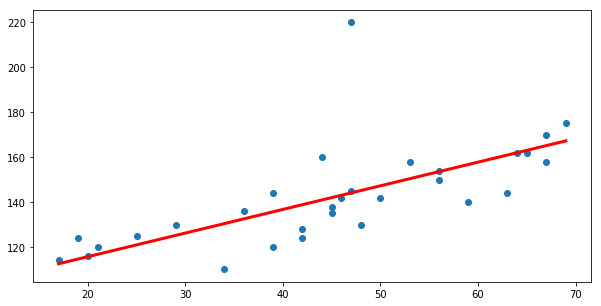

In [11]:
plt.plot(blood_pressure[0], blood_pressure[1], ".", markersize=12)
x1 = min(blood_pressure[0])
x2 = max(blood_pressure[0])
plt.plot([x1, x2], [_b + _W * x1, _b + _W * x2], color='r', linestyle='-', linewidth=3)
plt.show()

### Now, what can I expect my blood pressure to be when I am 31?

In [12]:
# Predicted blood pressure at age 31:
print _b + _W * 31

[ 127.25610352]
